<a href="https://colab.research.google.com/github/Joab-S/metaheuristica/blob/main/Metaheuristica_PCV.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Com a heurística de vizinho mais próximo vmp, verificamos que o ponto inicial pode alterar o valor da solução obtida. Avaliamos que poderíamos rodar o método para todos os possíveis pontos iniciais e pegar a melhor solução, vmp_completa. Contudo isso pode ser bastante custoso. Elabore um método vmp_amostral que realiza uma amostra das cidades e constrói um conjunto de pontos iniciais amostral com 10% das cidades. Verifique como isso se compara ao valor de vmp_completa.

__Etapas:__

Gerar as cidades com coordenadas;

Plotar a imagem dos pontos;

Gerar regioes de proximidade para separar as amostras representativas;

Aplicar a VMP_completa;

In [ ]:
import random
import matplotlib.pyplot as plt
import numpy as np
import math
import itertools

In [ ]:
todas_as_rotas = itertools.permutations

def forca_bruta(cidades):
    "Gera todas as possíveis rotas e escolhe a menor delas."
    return rota_mais_curta(todas_as_rotas(cidades))

def rota_mais_curta(rotas): 
    "Escolhe a rota com menor tamanho."
    return min(rotas, key=tamanho_rota)

In [ ]:
def Cities(n, h=600, w=900):
    """Faz um conjunto com n cidades, com coordenadas aleatórias no máximo (largura x altura)"""
    x = [random.random() * w for i in range(n)]
    y = [random.random() * h for i in range(n)]
    cities = list(zip(x, y))
    return cities

In [ ]:

def plot_rota(rota, completa=True):
  x = []
  y = []
  for i in range(len(rota)):
    x.append(rota[i][0])
    y.append(rota[i][1])

  if (completa):
    for i in range(len(rota)-1):
      for j in range(i+1,len(rota)):
        plt.plot([x[i], x[j]], [y[i], y[j]], color="LightGray", linewidth=1)

  for i in range(len(rota)):
    plt.plot([x[i], x[i-1]], [y[i], y[i-1]], color="Red", linewidth=2)

  plt.scatter(x, y, color="Blue", linewidth=3)


In [ ]:
def tamanho_rota(rota):
  "A distância total percorrida entre dois pares consecutivos em uma rota"
  return sum(distancia(rota[i-1], rota[i]) for i in range(len(rota)))

#TO DO: Função: distancia, Tipo de dados: cidades

In [ ]:
distancia = math.dist

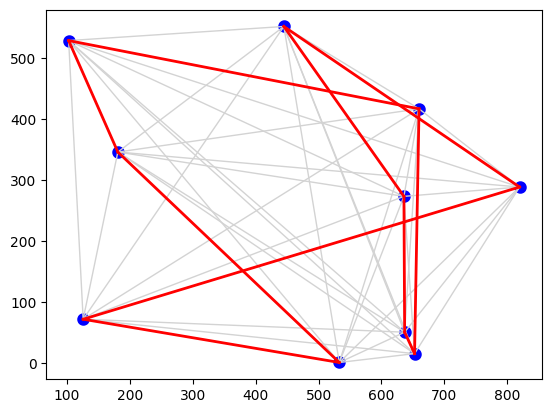

In [ ]:
plot_rota((Cities(10)))

In [ ]:
def vizinho_mais_proximo(cidades):
    """Comece a rota na primeira cidade; a cada passo estenda a rota
    movendo-se da cidade anterior para a vizinha mais próxima
    que ainda não foi visitada."""
    primeira = cidades[0]
    rota = [primeira]
    inexploradas = cidades.copy()
    inexploradas.remove(primeira)
    while inexploradas:
        C = mais_proxima(rota[-1], inexploradas)
        rota.append(C)
        inexploradas.remove(C)
    return rota

def mais_proxima(c, cidades):
    "Encontre a cidade mais próxima da cidade c."
    return min(cidades, key=lambda x: distancia(c, x))

In [ ]:
def vmp(cidades, inicio):
    """Comece a rota na primeira cidade; a cada passo estenda a rota
    movendo-se da cidade anterior para a vizinha mais próxima
    que ainda não foi visitada."""
    primeira = cidades[inicio]
    rota = [primeira]
    inexploradas = cidades.copy()
    inexploradas.remove(primeira)
    while inexploradas:
        C = mais_proxima(rota[-1], inexploradas)
        rota.append(C)
        inexploradas.remove(C)
    return rota


In [ ]:
def vmp_completa(cidades):
  return rota_mais_curta([ vmp(cidades, i) for i in range(len(cidades))])

In [ ]:
cidades = Cities(200)

Tamanho =  9884.847722871782


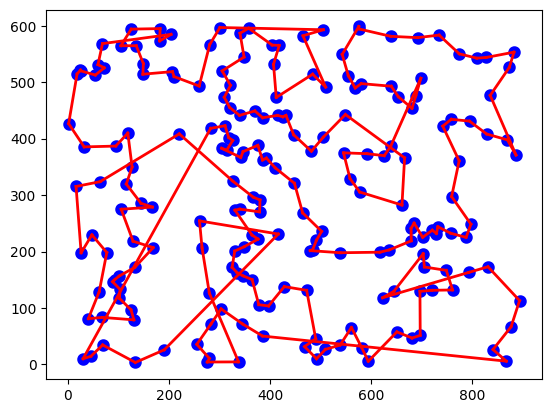

In [ ]:
rota = vmp(cidades, 122)
print("Tamanho = ", tamanho_rota(rota))
plot_rota(rota,completa=False)

Tamanho =  9260.000696787141


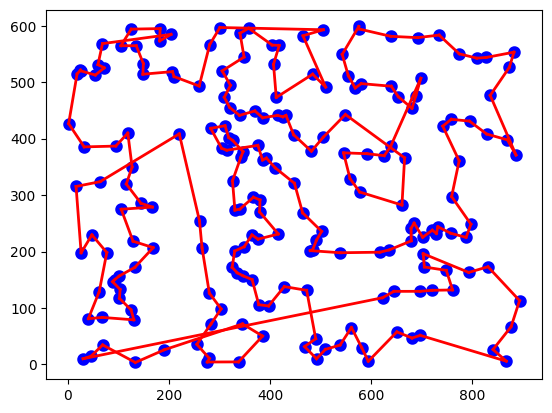

In [ ]:
rota = vmp_completa(cidades)
print("Tamanho = ", tamanho_rota(rota) )
plot_rota(rota,completa=False)

In [ ]:
def reverter(rota, i, j):
    "Se a reversão da rota [i:j] for mais curta então reverta." 
    u, v, x, y = rota[i-1], rota[i], rota[j-1], rota[j % len(rota)]
    if distancia(u, v) + distancia(x, y) > distancia(u, x) + distancia(v, y):
        rota[i:j] = reversed(rota[i:j])
        
def alterar_rota(rota):
    "Procura todas as possíveis reversões de segmentos"
    segmentos = todos_segmentos(len(rota))
    while True:
      tamanho_atual = tamanho_rota(rota)
      for (u, v) in segmentos:
        reverter(rota, u, v)
      if tamanho_rota(rota) >= tamanho_atual: break
    return rota

def todos_segmentos(n):
    "Retorna todos os pares que formam segmentos de caminho numa rota de tamanho n."
    return [(u, u + t)
            for t in range(n, 1, -1)
            for u in range(n - t + 1)]

8370.567305728018


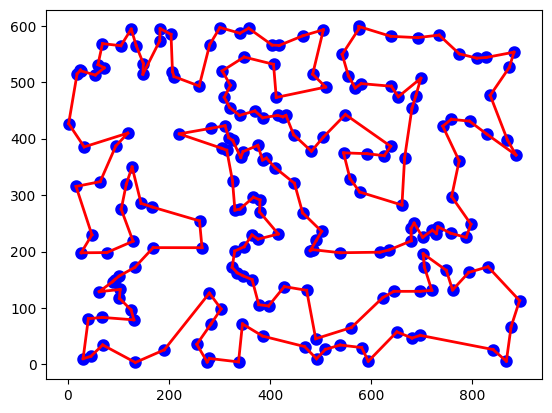

In [ ]:
r = alterar_rota(vmp_completa(cidades))
print(tamanho_rota(r))
plot_rota(r, completa=False)

Até o momento tudo acima foi contemplado no notebook de referência pelo qual obtivemos a introdução da problemática. A partir desse momento nós estaremos abordando a contrução de uma vmp_amostral, com uma porcentagem passada como um parametro em nossa função.

Inicialmente podemos pensar em uma seleção aleatória dos pontos para compor nossa amostra:

In [ ]:
def amostral_cities_indices(cities, n_percent):
    """Retorna uma lista com N% de cidades aleatórias da lista de cidades fornecida."""
    n = len(cities)
    n_random = int(n * n_percent / 100)
    random_cities = random.sample(range(0, n), n_random)
    return random_cities

def random_city_indice(cities):
    """Retorna o índice de uma cidade aleatória da lista de cidades fornecida."""
    random_city = random.sample(range(0, len(cities)), 1)
    return random_city

In [ ]:
def vmp_amostral(cidades, cidades_amostrais):
  return rota_mais_curta([vmp(cidades, i) for i in cidades_amostrais])

In [ ]:
indices_cidades_aleatorias = amostral_cities_indices(cidades, 10)
print(indices_cidades_aleatorias)
print("[", end='')
for i in indices_cidades_aleatorias:
  print(cidades[i], end = ", ")
print("]")

[37, 38, 13, 171, 110, 113, 166, 79, 57, 68, 163, 115, 168, 44, 31, 34, 64, 150, 32, 12]
[(794.8917885284565, 430.99397611250663), (1.4622277626750058, 426.579570869942), (406.9594019877117, 531.7344799592469), (685.2197999255599, 250.22816290732922), (220.40317459408087, 408.4478685329596), (45.561834594291795, 14.376506022495562), (144.8028943331996, 285.3256068103332), (204.0895842577439, 584.7782659911641), (345.4807414431777, 71.73410391071621), (280.65626547841435, 566.6452014582644), (348.6524633140249, 544.6142179749379), (653.9761041432948, 474.28372163219814), (346.6317997879187, 377.0198749602113), (761.3534658566477, 131.89381272497434), (128.93202973553898, 218.25741998864464), (32.25192176950837, 385.3710747945878), (465.20716080582235, 582.3137195745842), (545.5208248493439, 374.8545735949758), (133.53453584016654, 3.387817963023787), (873.7248980827741, 526.3933271021789), ]


Passamos a lista de pontos amostrais para nosso método de vmp_amostral, esse método se diferenciará do vmp_completo no sentido de que, ao invês de passar por todos os pontos possíveis como pontos iniciais, nós usaremos nosso conjunto amostral de pontos como possíveis inícios de rota.

8244.571394356724


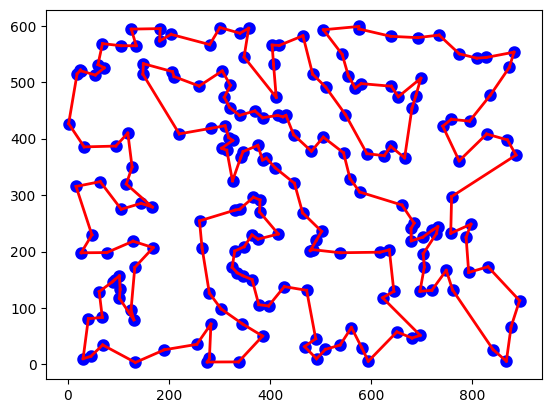

In [ ]:
r = alterar_rota(vmp_amostral(cidades, indices_cidades_aleatorias))
print(tamanho_rota(r))
plot_rota(r, completa=False)

Para ter uma verdadeira noção da interferência da amostra nos resultados, iremos utilizar as médias do tamanho_da_rota ao longo do tempo. Dado um conjunto de cidades, iremos selecionar uma amostra e calcular a média a cada iteração. Salvaremos a média e plotaremos um gráfico para análise.

media final =  8337.558780984033
lista = [8354.764750863336, 8362.666028295676, 8355.93467511538, 8367.0808081866, 8342.578925420625, 8344.609896327744, 8352.30345041362, 8363.005301153724, 8363.845523884202, 8355.463774880645, 8359.559723291519, 8365.019626605459, 8358.66162971087, 8353.424901954812, 8348.5317774144, 8344.396395511989, 8347.576888418864, 8351.882537009973, 8352.865945889871, 8355.14588734182, 8351.804522799284, 8348.648211170945, 8344.123132179022, 8341.658719669422, 8340.455216644295, 8341.639601822979, 8342.710998263905, 8340.55580786076, 8341.614201772114, 8339.639250612237, 8337.887901919135, 8339.109365214239, 8337.389859207013, 8336.539237071043, 8338.308538152694, 8336.82711298036, 8337.311914004224, 8337.045240067873, 8337.904780213006, 8338.881528891743, 8337.566789941911, 8337.976265201945, 8338.73419637697, 8338.819145749194, 8336.724751273805, 8334.721417427781, 8336.077659076742, 8335.567106680171, 8335.667716310194, 8334.601675323507, 8334.755994802552, 

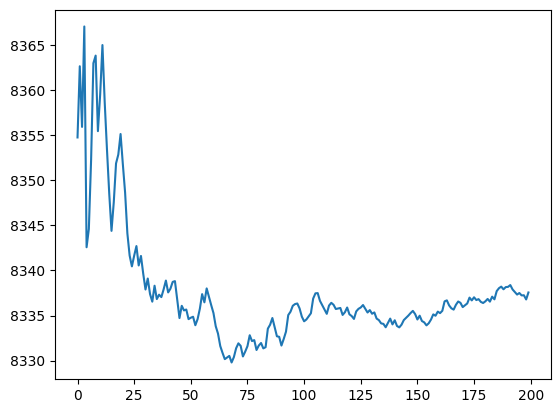

In [ ]:
mean = []

for i in range(200):
  amostras = amostral_cities_indices(cidades, 10)
  #print("amotras: ", amostras)

  r = alterar_rota(vmp_amostral(cidades, amostras))

  t_rota = tamanho_rota(r)

  n = len(mean)
  if n > 0:
    s = (mean[-1]*n + t_rota)/(n+1)
    mean.append(s)
  else:
    mean.append(t_rota)


plt.plot(range(0, len(mean)), mean)
print("media final = ", mean[-1])
print("lista =", mean)

In [ ]:
r = alterar_rota(vmp_completa(cidades))
print(tamanho_rota(r))

8370.567305728018


Após iniciar a execução, embora os valores iniciem bastante abrangentes, a medida que a execução se aproxima do fim, a média tende a um valor próximo ao valor real, todavia, há uma faixa de variação ainda muito grande.

**2 QUESTÃO**

In [ ]:
def subida_da_colina_lapidacao(cidades, max_iter=100, max_iter_sem_melhoria=10):
    "Encontre uma solução por busca local com a lapidação de rota com verificações."
    melhor_rota = None
    melhor_tamanho = float('inf')
    iter_sem_melhoria = 0

    for _ in range(max_iter):
        # Variação aleatória do início e reinício
        inicio = random.randint(0, len(cidades)-1)
        rota_atual = vmp(cidades, inicio)

        # Lapidação da rota atual com perturbação aleatória
        for _ in range(max_iter_sem_melhoria):
            rota_perturbada = alterar_rota(perturbar_rota(rota_atual))
            tamanho_perturbado = tamanho_rota(rota_perturbada)
            if tamanho_perturbado < melhor_tamanho:
                melhor_tamanho = tamanho_perturbado
                melhor_rota = rota_perturbada
                iter_sem_melhoria = 0
            else:
                iter_sem_melhoria += 1
        if iter_sem_melhoria >= max_iter_sem_melhoria:
            iter_sem_melhoria = 0
            
    return melhor_rota


def perturbar_rota(rota, n=3):
    "Perturba aleatoriamente n cidades na rota."
    indices = random.sample(range(len(rota)), n)
    rota_perturbada = rota.copy()
    for i, j in zip(indices[:-1], indices[1:]):
        rota_perturbada[i], rota_perturbada[j] = rota_perturbada[j], rota_perturbada[i]
    return rota_perturbada


In [ ]:
import matplotlib.pyplot as plt

def testar_algoritmo(n_vezes, cidades, max_iter=100, max_iter_sem_melhoria=10):
    "Executa o algoritmo 'n_vezes' vezes e plota a média dos resultados."
    resultados = []
    for i in range(n_vezes):
        rota = subida_da_colina_lapidacao(cidades, max_iter, max_iter_sem_melhoria)
        t_rota = tamanho_rota(rota)
        resultados.append(t_rota)
    media_resultados = [sum(resultados[:i+1])/(i+1) for i in range(n_vezes)]
    print(media_resultados[-1])
    plt.plot(range(n_vezes), media_resultados)
    plt.title(f'Média dos resultados para {n_vezes} vezes e {len(cidades)} cidades')
    plt.xlabel('Número de vezes')
    plt.ylabel('Tamanho da rota')
    plt.show()


8198.596880388246


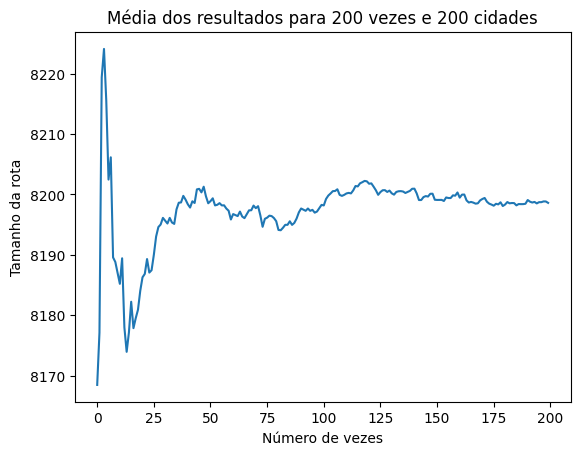

In [ ]:
testar_algoritmo(200, cidades, 10, 5)